In [73]:
import os

In [74]:
%pwd

'c:\\Users\\RICH-FILES\\Desktop\\ml\\client-subscription-prediction'

In [75]:
os.chdir("../")

In [76]:
%pwd

'c:\\Users\\RICH-FILES\\Desktop\\ml'

In [77]:
proj_link = 'c:\\Users\\RICH-FILES\\Desktop\\ml\\client-subscription-prediction'
os.chdir(proj_link)


In [78]:
# create root entity

from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class ModelTrainerConfig:
    root_dir: Path
    train_data_path: Path
    test_data_path: Path
    model_name: str
    preprocessor_name: str
    label_encoder_names: str
    sm_label_encoder: str
    sm_model_name: str
    sm_processor_name: str
    target_column: str
    random_state: int
    max_depth: int
    n_estimators: int
    sm_model_pipeline_name: str
    rf_model_name: str
    rf_preprocessor_name: str
    xgb_model_name: str
    xgb_preprocessor_name: str
   

    

In [79]:
proj_link = 'c:\\Users\\RICH-FILES\\Desktop\\ml\\client-subscription-prediction'
os.chdir(proj_link)

In [80]:
#create configuration manager 
#from clientClassifier.constants import *
from clientClassifier.constants import CONFIG_FILE_PATH, PARAMS_FILE_PATH, SCHEMA_FILE_PATH
from clientClassifier.utils.common import read_yaml, create_directories

In [81]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):
        
        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)
        
        create_directories([self.config.artifacts_root])
        
    def get_model_trainer_config(self) -> ModelTrainerConfig:
        config = self.config.model_trainer     
        params = self.params.xgb_classifier
        schema = self.schema.TARGET_COLUMN
        
        

        create_directories([config["root_dir"]])

        model_trainer_config = ModelTrainerConfig(
            root_dir=config.root_dir,
            train_data_path=config.train_data_path,
            test_data_path=config.test_data_path,
            model_name=config.model_name,
            preprocessor_name=config.preprocessor_name,
            sm_model_pipeline_name=config.sm_model_pipeline_name,
            label_encoder_names=config.label_encoder_names,
            sm_label_encoder=config.sm_label_encoder,
            sm_model_name=config.sm_model_name,
            sm_processor_name=config.sm_processor_name,
            target_column=schema.name,
            max_depth = params.max_depth,
            #class_weight=params.class_weight,
            n_estimators= params.n_estimators,
            random_state=params.random_state,
            rf_model_name   = config.rf_model_name,
            rf_preprocessor_name=config.rf_preprocessor_name,
            xgb_model_name=config.xgb_model_name,
            xgb_preprocessor_name=config.xgb_preprocessor_name
           
        )

        return model_trainer_config


In [82]:
#define model trainer components
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt
from clientClassifier import logger
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE 
from imblearn.pipeline import Pipeline as ImbPipeline   
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np





In [83]:

class ModelTrainer:
    def __init__(self, config: ModelTrainerConfig):
        self.config = config

    #def train(self):
        #logger.info("Training model")

        # Load train and test data
        #train_data = pd.read_csv(self.config.train_data_path)
        #test_data = pd.read_csv(self.config.test_data_path)

        # Separate features and target variable
        #X_train = train_data.drop(columns=[self.config.target_column], axis=1)
        #y_train = train_data[self.config.target_column]

        #X_test = test_data.drop(columns=[self.config.target_column], axis=1)
        #y_test = test_data[self.config.target_column]

        # Identify numerical and categorical feature columns
        #numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
        #categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

        # Apply Label Encoding to target variable
        #label_encoder = LabelEncoder()
        #y_train = label_encoder.fit_transform(y_train)
        #y_test = label_encoder.transform(y_test)

        # Preprocessing for features
        #numerical_transformer = StandardScaler()
        #categorical_transformer = OneHotEncoder(handle_unknown='ignore')

        #preprocessor = ColumnTransformer(
            #transformers=[
                #('num', numerical_transformer, numerical_features),
                #('cat', categorical_transformer, categorical_features)
            #]
        #)

        # Now you can fit a model using preprocessor and encoded targets

        #logger.info("Preprocessing and label encoding complete")

        
        # create a pipeline with preprocessing and model
        #pipeline = Pipeline([   
            #('preprocessor', preprocessor),
            #('classifier', LogisticRegression(
                #class_weight=self.config.class_weight,
                #max_iter=self.config.max_iter,
                #penalty=self.config.penalty,
                #C=self.config.C,
                #solver = self.config.solver,
                #random_state=self.config.random_state
            #))
        #])      
        
        # fit the pipeline on the training data
        #pipeline.fit(X_train, y_train)      
        
     
        # make predictions on the test data 
        #y_pred = pipeline.predict(X_test)      
         
        # evaluate the model
        #report = classification_report(y_test, y_pred)
        #cm = confusion_matrix(y_test, y_pred)   
        #accuracy = accuracy_score(y_test, y_pred)   
        
        #create Confusion Matrix Display
        #disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
        #disp.plot()
        #plt.title("Logistic Regression Matrix without SMOTE")
        
        
        
        
                    

        #logger.info(f"Classification Report:\n{report}")
        #logger.info(f"Confusion Matrix:\n{cm}") 
        #logger.info(f"Accuracy: {accuracy}")   
         
        # save the model    
        
        
        #model = pipeline.named_steps['classifier']
        #preprocessor = pipeline.named_steps['preprocessor'] 

        #model_path = os.path.join(self.config.root_dir, self.config.model_name)                     
        #preprocessor_path = os.path.join(self.config.root_dir, self.config.preprocessor_name)
        #joblib.dump(preprocessor, preprocessor_path)    
        #joblib.dump(model, model_path)
        #joblib.dump(label_encoder, os.path.join(self.config.root_dir, self.config.label_encoder_names))
          
        
        #logger.info(f"Model saved at: {model_path}")
        #logger.info(f"Preprocessor saved at: {preprocessor_path}")      
        
     
        
  
    #def train_with_SMOTE(self):
        #logger.info("Training model with SMOTE")

        # Load data
        #train_data = pd.read_csv(self.config.train_data_path)
        #test_data = pd.read_csv(self.config.test_data_path)

        # Separate features and target
        #X_train = train_data.drop(columns=[self.config.target_column])
        #y_train = train_data[self.config.target_column]

        #X_test = test_data.drop(columns=[self.config.target_column])
        #y_test = test_data[self.config.target_column]
        
        # Apply Label Encoding to target variable
        #label_encoder = LabelEncoder()
        #y_train = label_encoder.fit_transform(y_train)
        #y_test = label_encoder.transform(y_test)

        # Define numerical and categorical features
        #numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
        #categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
        
   
        # Transformers
        #numerical_transformer = StandardScaler()
        #categorical_transformer = OneHotEncoder(handle_unknown='ignore')

        #sm_preprocessor = ColumnTransformer(
            #transformers=[
                #('num', numerical_transformer, numerical_features),
                #('cat', categorical_transformer, categorical_features)
            #]
        #)

        #  Fitting model on resampled data
        #model = LogisticRegression(
            #class_weight=self.config.class_weight,
            #max_iter=self.config.max_iter,
            #penalty=self.config.penalty,
            #C=self.config.C,
            #solver = self.config.solver,
            #random_state=self.config.random_state
        #)
        
        # use the sm_pipeline to transform the data
        #sm_pipeline = ImbPipeline([
            #('preprocessor', sm_preprocessor),
            #('smote', SMOTE(random_state=self.config.random_state)),
            #('classifier', model)
        #])

        #sm_pipeline.fit(X_train, y_train)
            
        # make predictions on the test data 
        #y_pred = sm_pipeline.predict(X_test)

        # evaluate the model
        #resampled_report = classification_report(y_test, y_pred)
        #resampled_cm = confusion_matrix(y_test, y_pred)   
        #resampled_accuracy = accuracy_score(y_test, y_pred)
        
        #create Confusion Matrix Display
        #cm_display = ConfusionMatrixDisplay(confusion_matrix=resampled_cm, display_labels=label_encoder.classes_)
        #cm_display.plot()
        #plt.title("Logistic Regression with Matrix SMOTE")
                                            

        #logger.info(f"Classification Report:\n{resampled_report}")
        #logger.info(f"Confusion Matrix:\n{resampled_cm}") 
        #logger.info(f"Accuracy: {resampled_accuracy}")   
            
    
        # Save the model and preprocessor
        #joblib.dump(sm_pipeline,
                    #os.path.join(self.config.root_dir, 
                    #self.config.sm_model_pipeline_name))
        
       
         

        
        
        
    #def train_RandomForest(self):
        #logger.info("Training Random Forest model")

        # Load data
        #train_data = pd.read_csv(self.config.train_data_path)
        #test_data = pd.read_csv(self.config.test_data_path)

         # Separate features and target
        #X_train = train_data.drop(columns=[self.config.target_column])
        #y_train = train_data[self.config.target_column]

        #X_test = test_data.drop(columns=[self.config.target_column])
        #y_test = test_data[self.config.target_column]
        
        
        # Apply Label Encoding to target variable
        #label_encoder = LabelEncoder()
        #y_train = label_encoder.fit_transform(y_train)
        #y_test = label_encoder.transform(y_test)

         # Define numerical and categorical features
        #numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
        #categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

        # Transformers
        #numerical_transformer = StandardScaler()
        #categorical_transformer = OneHotEncoder(handle_unknown='ignore')

        #rf_preprocessor = ColumnTransformer(
            #transformers=[
                #('num', numerical_transformer, numerical_features),
                #('cat', categorical_transformer, categorical_features)
            #]
        #)


        # Preprocess X_train using fit_transform (fit only on training data)
        #X_train_processed = rf_preprocessor.fit_transform(X_train, y_train)

        # Fitting Random Forest model on the processed data
        #rf_model = RandomForestClassifier(max_depth= self.config.max_depth,
                                          #n_estimators=self.config.n_estimators, random_state=self.config.random_state,
                                          #class_weight=self.config.class_weight ) 
        



    
        #rf_model.fit(X_train_processed, y_train)        
        # make predictions on the test data 
        #X_test_processed = rf_preprocessor.transform(X_test)
        #y_pred_rf = rf_model.predict(X_test_processed)

        # evaluate the model
        #rf_report = classification_report(y_test, y_pred_rf)
        #rf_cm = confusion_matrix(y_test, y_pred_rf)   
        #rf_accuracy = accuracy_score(y_test, y_pred_rf)   

        #logger.info(f"Random Forest Classification Report:\n{rf_report}")
        #logger.info(f"Random Forest Confusion Matrix:\n{rf_cm}") 
        #logger.info(f"Random Forest Accuracy: {rf_accuracy}")
        
        # save the model
        #rf_model_path = os.path.join(self.config.root_dir, self.config.rf_model_name)   
        #rf_preprocessor_path = os.path.join(self.config.root_dir, self.config.rf_preprocessor_name)
        #joblib.dump(rf_model, rf_model_path)
        #joblib.dump(rf_preprocessor, rf_preprocessor_path)
        #return rf_report, rf_cm, rf_accuracy    
   
    
    
    def train_XGBClassifier(self):
        logger.info("Training XGBoost model")

        # Load data
        train_data = pd.read_csv(self.config.train_data_path)
        test_data = pd.read_csv(self.config.test_data_path)

        # Separate features and target
        X_train = train_data.drop(columns=[self.config.target_column])
        y_train = train_data[self.config.target_column]

        X_test = test_data.drop(columns=[self.config.target_column])
        y_test = test_data[self.config.target_column]
        
        
        # Apply Label Encoding to target variable
        label_encoder = LabelEncoder()
        y_train = label_encoder.fit_transform(y_train)
        y_test = label_encoder.transform(y_test)
        
    

        # calculating "scale_pos_weight"
        neg = np.sum(y_train == 0)  # count of negative class
        pos = np.sum(y_train == 1)  # count of positive class

        scale_pos_weight = neg / pos
        print(f"scale_pos_weight = {scale_pos_weight:.2f}")
        
        


        # Define numerical and categorical features
        numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

        # Transformers
        numerical_transformer = StandardScaler()
        categorical_transformer = OneHotEncoder(handle_unknown='ignore')

        xgb_preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer, numerical_features),
                ('cat', categorical_transformer, categorical_features)
            ]
        )

        # Preprocess X_train using fit_transform (fit only on training data)
        X_train_processed = xgb_preprocessor.fit_transform(X_train)

        # Fitting XGBoost model on the processed data
        xgb_model = XGBClassifier(random_state=self.config.random_state,
                                   n_estimators=self.config.n_estimators,
                                   max_depth=self.config.max_depth,
                                   scale_pos_weight=scale_pos_weight)
        
          
        xgb_model.fit(X_train_processed, y_train)

        # make predictions on the test data 
        X_test_processed = xgb_preprocessor.transform(X_test)
        y_pred_xgb = xgb_model.predict(X_test_processed)

        # evaluate the model
        xgb_report = classification_report(y_test, y_pred_xgb)
        xgb_cm = confusion_matrix(y_test, y_pred_xgb)   
        xgb_accuracy = accuracy_score(y_test, y_pred_xgb)   
        
        #create Confusion Matrix Display
        cm_display = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=label_encoder.classes_)
        cm_display.plot()
        plt.title("XGBClassifier Matrix")

        logger.info(f"XGBoost Classification Report:\n{xgb_report}")
        logger.info(f"XGBoost Confusion Matrix:\n{xgb_cm}") 
        logger.info(f"XGBoost Accuracy: {xgb_accuracy}")
        
        # save the model
        xgb_label_path = os.path.join(self.config.root_dir, self.config.label_encoder_names )
        xgb_model_path = os.path.join(self.config.root_dir, self.config.xgb_model_name)   
        xgb_preprocessor_path = os.path.join(self.config.root_dir, self.config.xgb_preprocessor_name)
        
        joblib.dump(label_encoder, xgb_label_path)
        joblib.dump(xgb_model, xgb_model_path)
        joblib.dump(xgb_preprocessor, xgb_preprocessor_path)
        return xgb_report, xgb_cm, xgb_accuracy
    
        
            
        
        
        
            

[2025-04-26 15:21:22,155: INFO: common: yaml file: config\config.yaml loaded successfully]
[2025-04-26 15:21:22,161: INFO: common: yaml file: params.yaml loaded successfully]
[2025-04-26 15:21:22,167: INFO: common: yaml file: schema.yaml loaded successfully]
[2025-04-26 15:21:22,174: INFO: common: created directory at: artifacts]
[2025-04-26 15:21:22,176: INFO: common: created directory at: artifacts/model_trainer]
[2025-04-26 15:21:22,178: INFO: 107080161: Training XGBoost model]
scale_pos_weight = 7.55
[2025-04-26 15:21:22,682: INFO: 107080161: XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       807
           1       0.27      0.40      0.33        98

    accuracy                           0.82       905
   macro avg       0.60      0.64      0.61       905
weighted avg       0.85      0.82      0.83       905
]
[2025-04-26 15:21:22,683: INFO: 107080161: XGBoost Confusion Matrix:
[[704 103]
 [ 59  3

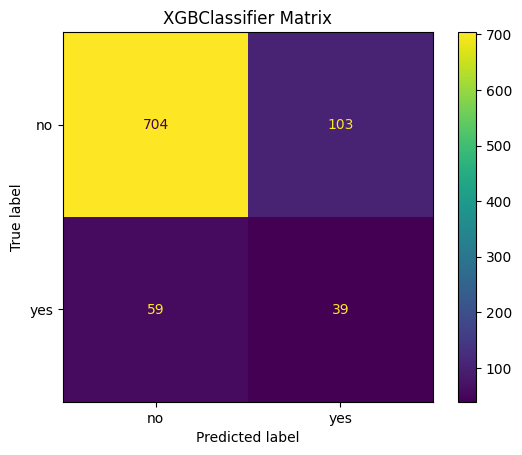

In [ ]:


try:
    config = ConfigurationManager()
    model_trainer_config = config.get_model_trainer_config()
    model_trainer = ModelTrainer(model_trainer_config)
    #model_trainer.train()
    #model_trainer.train_with_SMOTE() 
    #model_trainer.train_RandomForest()

    model_trainer.train_XGBClassifier()
except Exception as e:
    logger.exception("Error training XGBClassifier: " + str(e))
    raise e
except Exception as e:
    logger.exception(e)
    raise e 

